# Previsão de Doenças Cardiovasculares com ML 

Modelo de classificação utilizando Machine Learning para detecção de doenças cardiovasculares.

Etapas:
 * Análise exploratória de dados (Exploratory data analysis - EDA)
 * Treinamento de modelo (Model training)
 * Avaliação de modelo (Model evaluation)
 * Comparação de modelos (Model comparison)
 * Ajuste fino do modelo (Model fine-tuning)
 * Características importantes (Feature importance)
 * Validação cruzada (Cross-validation)
 * Relatório(Reporting)
 

## Problema

Dados os parâmetros clínicos de um paciente, é possível prever se ele tem ou não uma doença cardíaca? 

Este é um problema de classificação binária(paciente tem doença cardíaca ou não)


## Dados

https://archive.ics.uci.edu/ml/datasets/heart+disease

https://www.kaggle.com/ronitf/heart-disease-uci


## Features

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target(variável alvo) - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
# Bibliotecas utilizadas

# Pandas para análise de dados.
# NumPy para realizar operações numéricas.
# Matplotlib e seaborn para gráficos/visualização.
# Scikit-Learn para machine learning.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Para os gráficos aparecerem no notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Carregando a base
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Análise exploratória de dados(EDA)



In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# 1 = Doença Cardíaca, 0 = Sem Doença Cardíaca
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# Em porcentagem
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

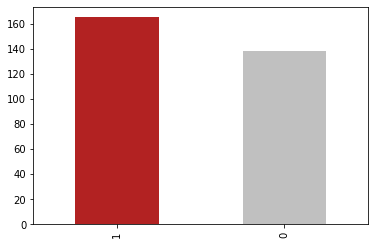

In [6]:
df.target.value_counts().plot(kind="bar", color=["firebrick", "silver"]);

In [7]:
# Valores em branco
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Número de pessoas por sexo 1 = male, 0 = female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Comparação sexo x target
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
# Porcentagem por sexo na amostra
df.sex.value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

Pelos valores acima, vemos que existe uma probabilidade de 72/96 = 0.75 para homens e,
93/207 = 0.45 para mulheres de terem algum problema cardíaco. 

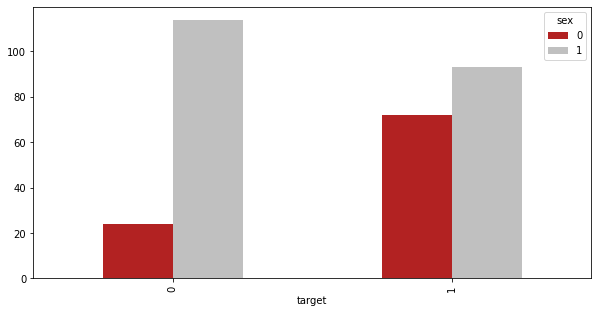

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,5), 
                                    color=["firebrick", "silver"]);

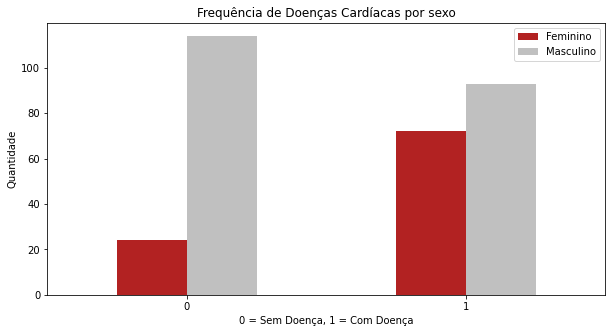

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,5), color=["firebrick", "silver"])

plt.title("Frequência de Doenças Cardíacas por sexo")
plt.xlabel("0 = Sem Doença, 1 = Com Doença")
plt.ylabel("Quantidade")
plt.legend(["Feminino", "Masculino"])
plt.xticks(rotation=0); # manter valores do eixo x na vertical

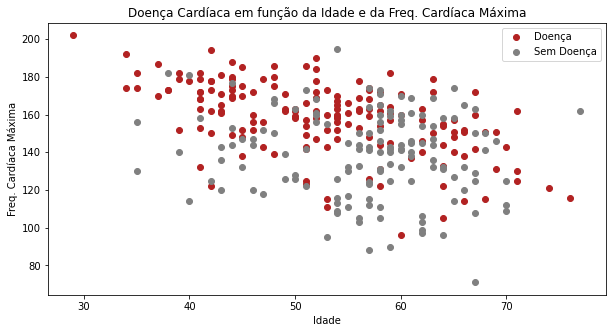

In [14]:
plt.figure(figsize=(10,5))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="firebrick") 

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="grey")

plt.title("Doença Cardíaca em função da Idade e da Freq. Cardíaca Máxima")
plt.xlabel("Idade")
plt.legend(["Doença", "Sem Doença"])
plt.ylabel("Freq. Cardíaca Máxima");

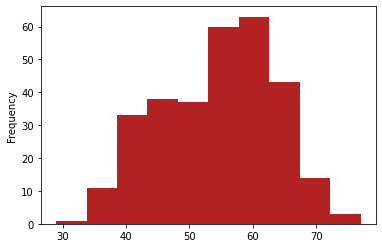

In [15]:
# Histograma se aproxima de uma Normal.
df.age.plot.hist(color="firebrick");

In [16]:
# Comparativo do indicador chestpain com o target.
# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


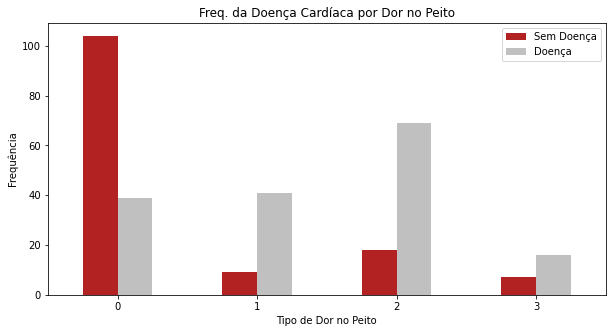

In [17]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,5), 
                                   color=["firebrick", "silver"])

# Add attributes to the plot to make it more readable
plt.title("Freq. da Doença Cardíaca por Dor no Peito")
plt.xlabel("Tipo de Dor no Peito")
plt.ylabel("Frequência")
plt.legend(["Sem Doença", "Doença"])
plt.xticks(rotation = 0);

In [18]:
# Correlação entre as variáveis independentes
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


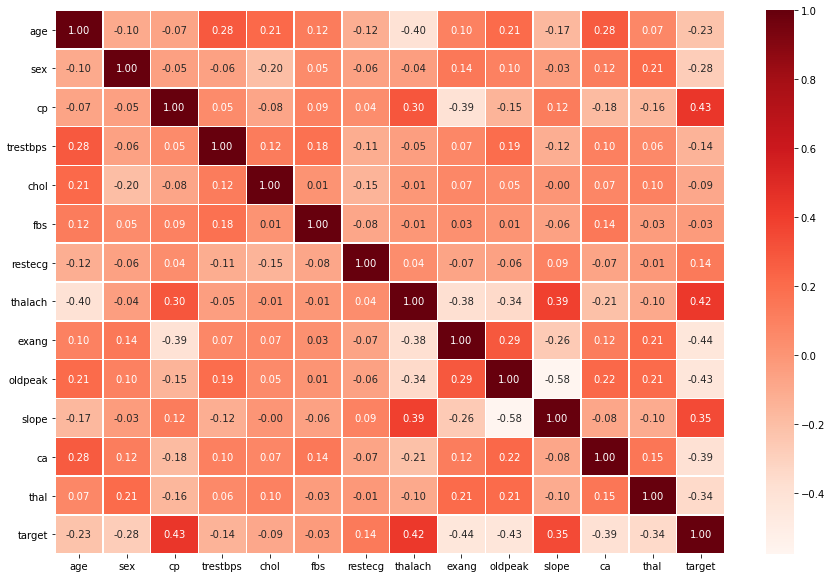

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Reds");

## Início da modelagem

Buscamos atingir um mínimo de 95% de precisão na detecção de doenças cardíacas nessa amostra.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Tirar a variável target da base
X = df.drop("target", axis=1)

# Variável target
y = df.target.values

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and test split

Precisamos dividir a nossa base de dados em uma para treinamento do modelo(training set) e 
outra para testá-lo(test set).

Para isso vamos usar o Scikit-Learn's train_test_split() e alimentá-los com nossas variáveis independentes e 
dependentes(X & y).

In [24]:
# Random seed para reprodução
np.random.seed(42)

# Train and test set
X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size = 0.2) # percentual a ser utilizado no test set.

In [25]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [26]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [28]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

In [29]:
# Criando um dicionário com os modelos.
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Função para ajustar os modelos.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Ajusta e calcula os modelos de ML.
    models : dicionário de diferentes modelos de ML do Scikit-Learn
    X_train : dados de treino (training data)
    X_test : dados de teste (testing data)
    y_train : saídas dos dados de treino
    y_test : saídas dos dados de teste
    """
    # Random seed para reprodução
    np.random.seed(42)
    # Lista para manter o resultado do modelo
    model_scores = {}
    # Loop entre os modelos
    for name, model in models.items():
        # Ajustar modelo para os dados
        model.fit(X_train, y_train)
        # Calcular resultado do modelo e salvar em model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\giova\anaconda3\envs\ds37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Comparação dos modelos

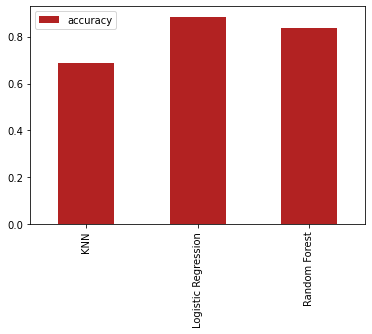

In [31]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color="firebrick");

Para testar os hiperparâmetros, utilizaremos a validação cruzada (cross-validation).


In [32]:
# Lista para manter o resultado do modelo de treinamento
train_scores = []

# Lista para manter o resultado do modelo de teste
test_scores = []

# Lista de valores para n_neighbors
neighbors = range(1, 21) # 1 a 20

# Algoritmo
knn = KNeighborsClassifier()

# Loop em diferente valores de n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Ajuste do algoritmo
    knn.fit(X_train, y_train)
    
    # Atualizar os valores de treinamento
    train_scores.append(knn.score(X_train, y_train))
    
    # Atualizar os valores do teste
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Valor Máximo do KNN nos dados de teste: 75.41%


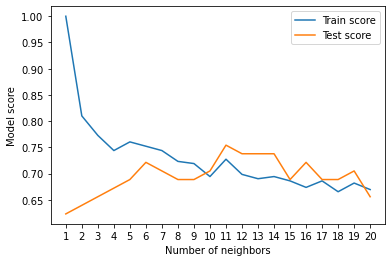

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Valor Máximo do KNN nos dados de teste: {max(test_scores)*100:.2f}%")

Agora vamos testar os modelos que se saíram melhor até então, `LogisticsRegression` e `RandomForestClassifier`.

Com o `RandomizedSearchCV` podemos rodar várias combinações de hiperparâmetros, e decidir pelo melhor.

In [35]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Vamos utilizar o `RandomizedSearchCV` com o `LogisticRegression`.

In [36]:
# Setup random seed
np.random.seed(42)

# random hyperparameter search para a regressão logística
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# ajustar random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Vamos utilizar o `RandomizedSearchCV` com o `RandomForestClassifier`.

In [39]:
# Setup random seed
np.random.seed(42)

# Configurar random hyperparameter search para o RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Ajustar o random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
# Melhores hiperparâmetros
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
# Calcular o randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Enquanto o `RandomizedSearchCV` testa `n_iter` combinações de hiperparâmetros e salva o melhor.
o `GridSearchCV` testa todas as combinações possíveis.

Vamos testar `GridSearchCV` com o `LogisticRegression`.

In [42]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Grid hyperparameter search para LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Treinar grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
# Melhores hiperparâmetros
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [44]:
# Avaliar o modelo
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [45]:
# Predição nos dados de teste
y_preds = gs_log_reg.predict(X_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

ROC Curve - A curva ROC compara a taxa de verdadeiro positivo com a taxa de falso positivo.

AUC - Area under Curve, mede a área da curva acima. Valor ideal AUC = 1.00 

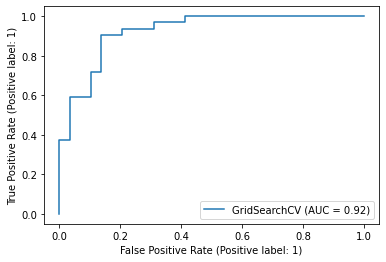

In [48]:
# Importar curva ROC (Receiver Operating Characterisitc) curve function do módulo metrics
from sklearn.metrics import plot_roc_curve

# Plotar curva ROC calcular métrica AUC (Area Under Curve)
plot_roc_curve(gs_log_reg, X_test, y_test);

Confusion Matrix - mede onde o modelo acertou e onde errou as previsões

In [49]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


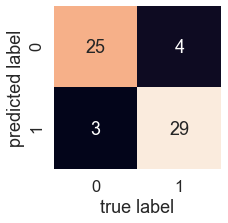

In [50]:
# Importar Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plota uma Matriz de confusão com Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Classification Report - nos dá informações sobre precision, recall, F-1 sobre o nosso modelo.

Precision - Indica a proporção de identificações positivas(classe 1 do modelo) que estavam realmente corretas. 
Um modelo que não produz falsos positivos tem uma precisão de 1.0
Fórmula: True Positive/ (True Positive + False Positive)

Recall  - Indica a proporção de positivos reais que foram classificados corretamente. 
Um modelo que não produz falsos negativos tem um recall de 1.0
Fórmula: True Positive/ (True Positive + False Negative)

F1 score - Uma combinação de precision e recall. Ideal = 1.0.

Support - O número de amostras em que cada métrica foi calculada.

Accuracy - A precisão do modelo na forma decimal. Ideal = 1.0.

Weighted avg(Média ponderada) - Cada métrica é calculada em relação a quantas amostras existem em cada classe. 
Esta métrica favorecerá a classe majoritária.

In [51]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
# Melhores hiperparâmetros
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
# Importar cross_val_score
from sklearn.model_selection import cross_val_score

# Instanciar o melhor modelo com hiperparâmetros
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [54]:
# Validação Cruzada (accuracy)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [56]:
# Validação Cruzada (precision)
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [57]:
# Validação Cruzada (recall)
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [58]:
# Validação Cruzada (F1)
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

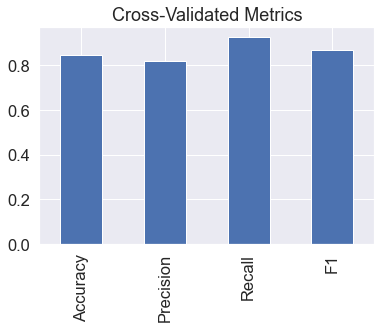

In [59]:
# Validação Cruzada (Métricas)
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

Feature importance - busca analisar o que mais contribuiu para o resultado do modelo.

In [60]:
# Ajustar uma instância de LogisticRegression
clf.fit(X_train, y_train);

In [61]:
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [62]:
# Colocar features em colunas
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

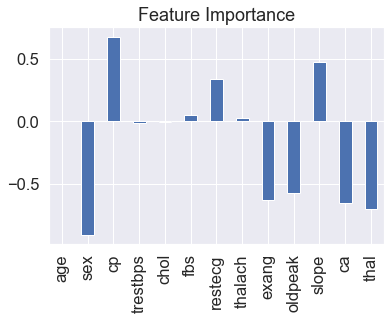

In [63]:
# Features
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Nessa base de dados, vemos uma proporção muito maior de mulheres com doenças no coração do que homens.

Mulheres: 72/96 = 0.75

Homens: 93/207= 0.45

Correlação negativa de 0.90 entre as variáveis sexo e target.

In [64]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Existe uma correlação positiva entre a variável slope e a target(0.47)

Slope - the slope of the peak exercise ST segment.
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

In [65]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Existe uma correlação negativa entre a variável exang e a target(0.63).

Aparentemente, dor causada por angina induzida por exercícios físicos não é um parâmetro ideal para determinação de doenças no coração. 

Exang: exercise induced angina (1 = yes; 0 = no) 

In [66]:
pd.crosstab(df["exang"], df["target"])

target,0,1
exang,,
0,62,142
1,76,23


Existe uma correlação positiva entre a variável restecg e a target(0.33).

A amostra é muito pequena com o resultado do exame cardíaco de valor 2.
No entanto, para o valor 1 (ST-T wave abnormality), a proporção de pessoas com doenças no coração é bem alta 96/152 = 0.63

restecg: resting electrocardiographic results

 Value 0: normal

 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
 Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

In [67]:
pd.crosstab(df["restecg"], df["target"])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1
